Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the required dataset/Creating a dataframe of the dataset

In [3]:
df = pd.read_csv('Telecom Customer Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Replacing blank with 0 as tenure is 0 and datatype of TotalCharges Column is converted from object to float

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Checking for null

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Descripitive Analysis of dataset
    
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#Checking for duplicates

print(df.duplicated().sum())

# print(df["customerID"].duplicated().sum())

0


Converted 0 and 1 to no and yes for seniorcitizenship

In [9]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"
        
df["SeniorCitizen"] = df["SeniorCitizen"].map(convert)

In [10]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Analyzing the no of churned customers using count plot

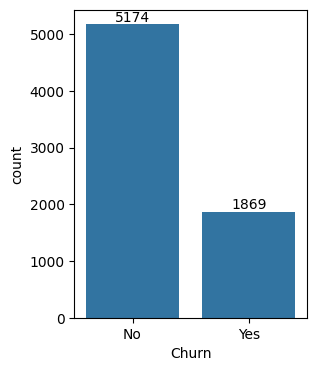

In [11]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = 'Churn' , data = df)
ax.bar_label(ax.containers[0])
plt.show()

We concluded that 5174 customers have not churned and 1869 customers have churned

Now let's analyze it in terms of percentage

In [12]:
gb = df.groupby("Churn").agg({"Churn" : "count"})
print(gb)

       Churn
Churn       
No      5174
Yes     1869


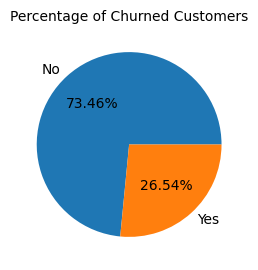

In [13]:
plt.figure(figsize = (3,3))
plt.pie(gb['Churn'] , labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers" , fontsize = 10)
plt.show()

From the above pie chart we can conclude that 26.54% of our customer have churned

Now let's explore the reason behind it.

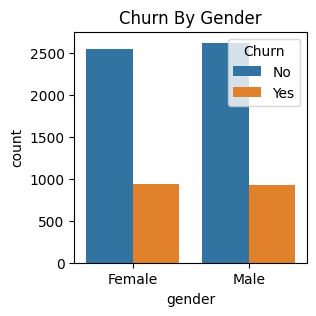

In [14]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender" , data = df , hue = "Churn")
plt.title("Churn By Gender")
plt.show()

From the above plot we have churned by gender and we can observe that churned female and churned male are almost same and we can not conclude clearly from the above plot.

Now let's churn with senior citizen

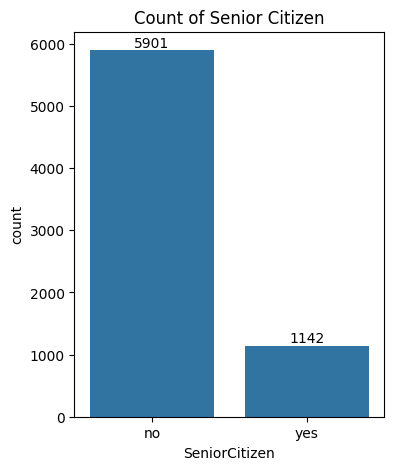

In [15]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Senior Citizen")
plt.show()

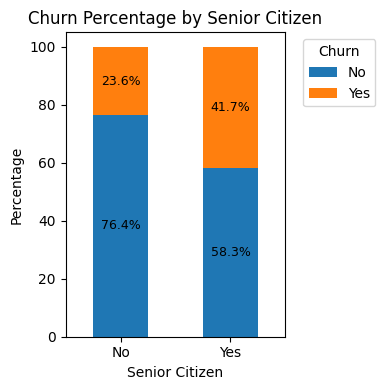

In [16]:
# Calculate percentages
churn_pct = (
    df.groupby("SeniorCitizen")["Churn"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)

# Plot
ax = churn_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(4,4),
)

# Add percentage labels inside bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            f"{height:.1f}%",
            ha="center",
            va="center",
            fontsize=9,
            color="black"
        )

# Formatting
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.title("Churn Percentage by Senior Citizen")
plt.xticks([0, 1], ["No", "Yes"], rotation=0)
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

From the above plotting we can conclude that, comparatively a greater percentage of customers who are senior citizen have churned

Now let's see the churning based on tenure

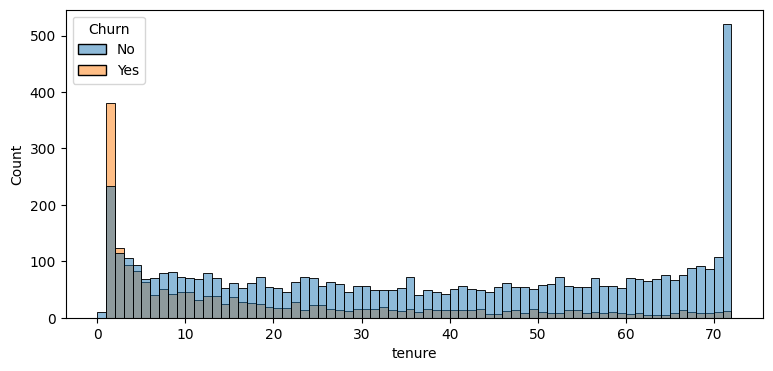

In [17]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure" , data = df , bins = 72 , hue = "Churn")
plt.show()

People who have used our services for long time have stayed and people who have used our services for 1 or 2 months have churned.

Now let's see churning based on contracts

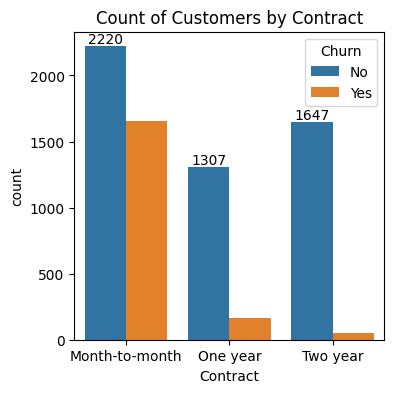

In [18]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

Customer who have month to month contract are likely to churn than from who have 1 or 2 years of contract

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

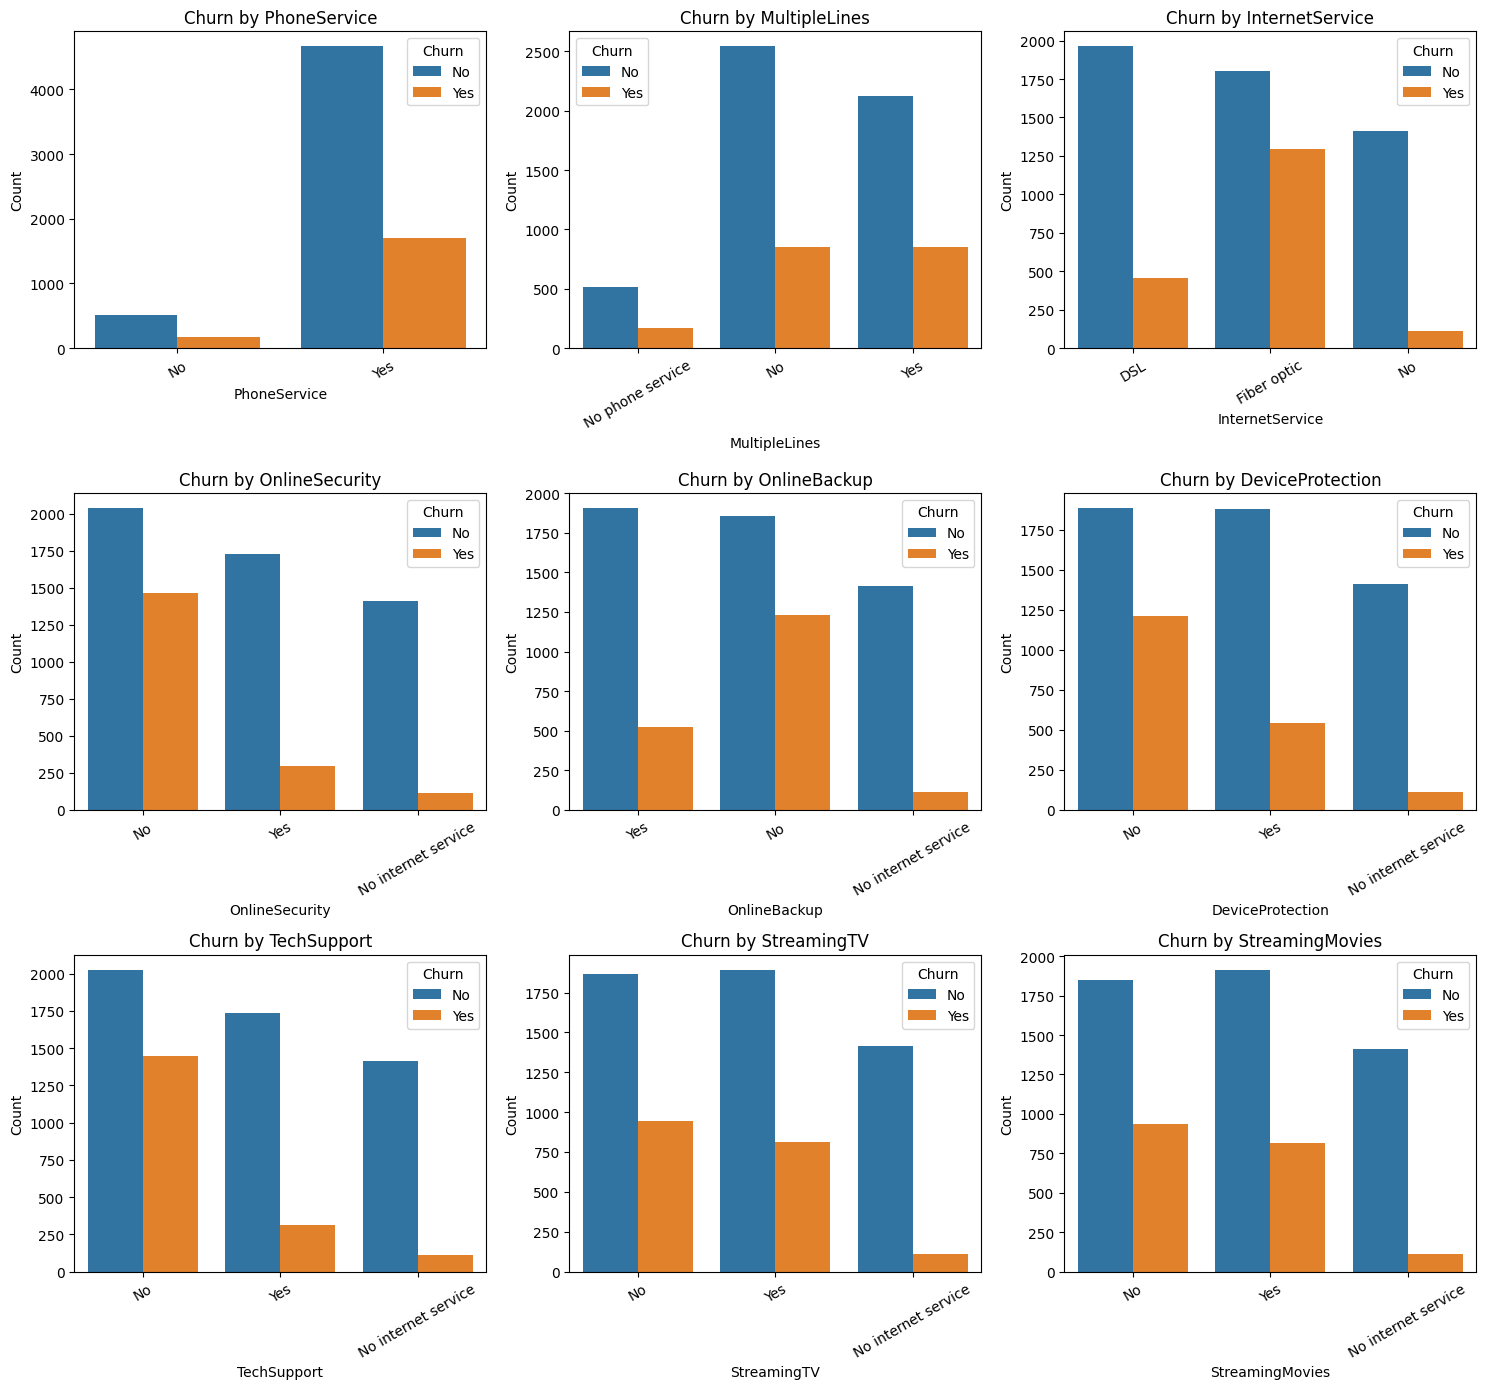

In [20]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplot grid (3 rows x 3 cols)
fig, axes = plt.subplots(3, 3, figsize=(15,14))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(
        x=col,
        data=df,
        hue="Churn",
        ax=axes[i]
    )
    axes[i].set_title(f"Churn by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

# Remove any unused axes (safety)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
 
plt.show()

Customers with Fiber optic internet, no online security, no tech support, and no device protection show significantly higher churn.
Churn is generally lower for customers who subscribe to add-on services like online security, backup, and tech support.
Users with no internet service have the lowest churn rates across most categories.
Overall, value-added services strongly correlate with better customer retention.

Now let's see churning based on contracts

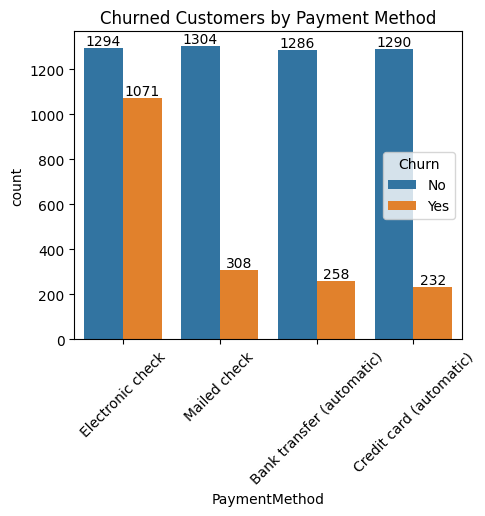

In [21]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = "PaymentMethod" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

From the above plotting we can conclude that customers with Electronic Check Payment system churned more in compare to customers with other payment system